In [21]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [2]:
data= pd.read_csv("../data/processed/Clean_AmesHousing.csv")
data.head()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial,SalePrice
0,-1.731460,-0.997164,-0.877005,3.375742,2.744381,-0.067254,-0.506718,-0.375537,-1.163488,0.061046,...,0,0,1,0,0,0,0,1,0,215000
1,-1.730277,-0.996904,-0.877005,0.514952,0.187097,-0.776079,0.393091,-0.342468,-1.115542,-0.566039,...,0,0,1,0,0,0,0,1,0,105000
2,-1.729095,-0.996899,-0.877005,0.561850,0.522814,-0.067254,0.393091,-0.441674,-1.259380,0.038650,...,0,0,1,0,0,0,0,1,0,172000
3,-1.727913,-0.996888,-0.877005,1.124628,0.128458,0.641571,-0.506718,-0.110988,-0.779919,-0.566039,...,0,0,1,0,0,0,0,1,0,244000
4,-1.726731,-0.992903,0.061285,0.233563,0.467348,-0.776079,-0.506718,0.848000,0.658466,-0.566039,...,0,0,1,0,0,0,0,1,0,189900


In [28]:
# setup random seed
np.random.seed(123)

# create train and test dataset
X = data.drop(columns="SalePrice", axis=1)
y = data["SalePrice"]

# spliting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

# instantiate Ridge model
model_ridge = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
model_ridge.fit(X_train, y_train)

# test score of Ridge model on test data
model_ridge.score(X_test, y_test)

0.8884591669625419

In [29]:
y_pred = model_ridge.predict(X_test)

In [30]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(f"R² Score: {r2_score(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")

R² Score: 0.8884591669625419
Mean Absolute Error: 15842.062901271614
Mean Squared Error: 608306865.827236


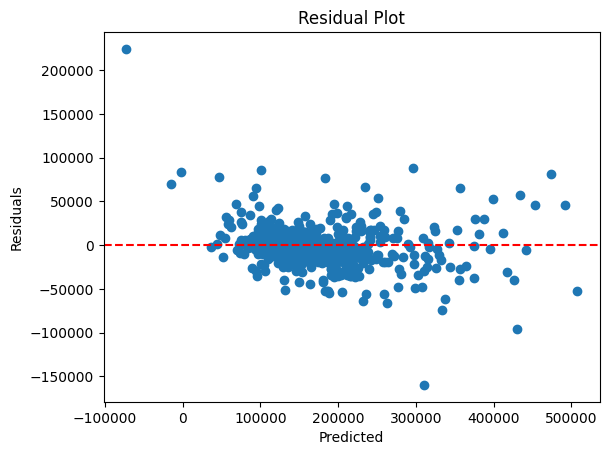

In [25]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [37]:
# lets try Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

# setup random seed 
np.random.seed(123)

# create train and test dataset
X = data.drop(columns="SalePrice", axis=1)
y = data["SalePrice"]

# spliting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

# instantiate Ridge model
model_rf = RandomForestRegressor(n_estimators= 100)
model_rf.fit(X_train, y_train)

# test score of Ridge model on test data
model_rf.score(X_test, y_test)

0.9048176020101802

In [38]:
y_pred_rf = model_rf.predict(X_test)

In [39]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(f"R² Score: {r2_score(y_test, y_pred_rf)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_rf)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_rf)}")

R² Score: 0.9048176020101802
Mean Absolute Error: 14474.067218430035
Mean Squared Error: 519093363.62642777


In [33]:
print(f"ridge score: {model_ridge.score(X_test, y_test)}")
print(f"random forest score: {model_rf.score(X_test, y_test)}")

ridge score: 0.8884591669625419
random forest score: 0.9048176020101802
